### **RNN(Recurrent Nerual Network)**

인공 신경망의 한 종류로 유닛간의 연결이 순환적 구조를 갖는 신경망으로 입력과 출력을 시퀀스 단위로 처리하는 모델 

시계열 데이터와 같이 시간에 흐름에 따라 변화하는 데이터를 학습 하기 위함

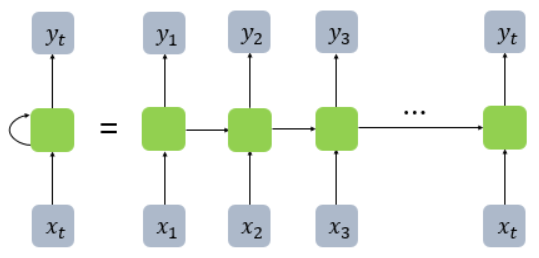

### **RNN Architecture**
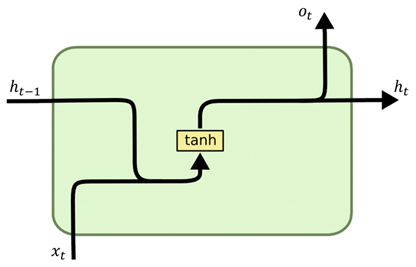


- $h_t$는 다른 계층을 향해 위쪽으로 출력되는 동시에 다음 시각의 RNN계층(자기 자신)을 향해 오른쪽으로도 출력
- RNN의 출력 $h_t$는 은닉상태(hidden state) 혹은 은닉 상태 벡터(hidden state vector)라고 함.
- RNN은 $h$라는 '상태'를 가지고 있으며 오른쪽의 식의 형태로 갱신된다고 해석할 수 있음
- RNN계층을 '상태를 가지는 계층' 혹은 '메모리(기억력)가 있는 계층'이라고 함.


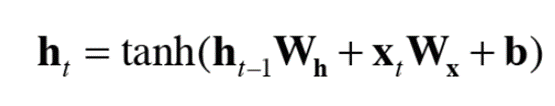
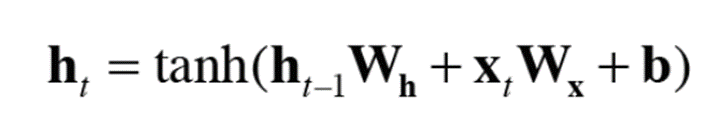

### **RNN Cell**

In [ ]:
import torch 

class rnn_cell(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        
        self.hidden_dim = hidden_dim
        
        
        self.wx = nn.Linear(in_dim, hidden_dim)
        self.wh = nn.Linear(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, out_dim)
        
    
    def forward(self, x, h0 = None):

        if h0 is None:  # h0이 제공되지 않으면 초기 히든 상태 생성
            h0 = torch.zeros(x.size(0), self.hidden_dim, device=x.device)
                    
        h_t = torch.tanh(self.wx(x) + self.wh(h0))
        out = self.fc(h_t)
        
        return out, h_t
        

class rnn_cell(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        
        self.hidden_dim = hidden_dim
        self.w = nn.Linear(in_dim + hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, out_dim)

        
    def forward(self, x, h0 = None):
        
        if h0 is None:  # h0이 제공되지 않으면 초기 히든 상태 생성
            h0 = torch.zeros(x.size(0), self.hidden_dim, device=x.device)
            
        x_ht_1 = torch.cat([x, h0], dim = 1)
        
        h_t = torch.tanh(self.w(x_ht_1))
        
        out = self.fc(h_t)
        
        return out, h_t
    

### **RNN을 활용한 예측**